In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Step 1:Data Collection And Load

In [39]:

class CarPriceDataset:
    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
    
    

    def load_data(self):
        self.df = pd.read_csv(self.filepath)
        return self.df

    def initial_info(self):
        return self.df.info(), self.df.head()


dataset = CarPriceDataset("D:\\New folder (3)\\heart.csv")

df = dataset.load_data() 

info, head = dataset.initial_info()

print(" Dataset Info:")
print(info)

print("\n First 5 Rows:")
print(head)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
 Dataset Info:
None

 First 5 Rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0   

# Step 2: Data Preprocessing

In [40]:
class DataPreprocessing:
    def __init__(self, df):
        self.df = df.copy()

    def check_missing(self):
        """Check missing values"""
        print("\n Missing Values in Dataset:")
        print(self.df.isnull().sum())

    def handle_missing(self):
        """Fill or drop missing values"""
        self.df = self.df.dropna()   
        return self.df

    def remove_duplicates(self):
        """Remove duplicate rows"""
        before = self.df.shape[0]
        self.df = self.df.drop_duplicates()
        after = self.df.shape[0]
        print(f"\nRemoved {before - after} duplicate rows.")
        return self.df

    def encode_categorical(self):
        """Encode categorical columns if any"""
        le = LabelEncoder()
        for col in self.df.select_dtypes(include=['object']).columns:
            self.df[col] = le.fit_transform(self.df[col])
        return self.df

    def scale_features(self):
        """Scale numerical features"""
        scaler = StandardScaler()
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        self.df[num_cols] = scaler.fit_transform(self.df[num_cols])
        return self.df

    def get_processed_data(self):
        return self.df


if __name__ == "__main__":
    df = pd.read_csv("D:\\New folder (3)\\heart.csv")

    preprocess = DataPreprocessing(df)

    preprocess.check_missing()
    df = preprocess.handle_missing()
    df = preprocess.remove_duplicates()
    df = preprocess.encode_categorical()
    df = preprocess.scale_features()

    print("\n Final Processed Data (first 5 rows):")
    print(df.head())



 Missing Values in Dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Removed 723 duplicate rows.

 Final Processed Data (first 5 rows):
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.267966  0.682656 -0.935208 -0.376556 -0.667728 -0.418446  0.901657   
1 -0.157260  0.682656 -0.935208  0.478910 -0.841918  2.389793 -1.002541   
2  1.724733  0.682656 -0.935208  0.764066 -1.403197 -0.418446  0.901657   
3  0.728383  0.682656 -0.935208  0.935159 -0.841918 -0.418446  0.901657   
4  0.839089 -1.464866 -0.935208  0.364848  0.919336  2.389793  0.901657   

    thalach     exang   oldpeak     slope        ca      thal   target  
0  0.806035 -0.698344 -0.037124  0.979514  1.274980  1.119967 -1.09014  
1  0.237495  1.431958  1.773958 -2.271182 -0.714911  1.119967 -1.09014  
2 -1.074521  1.431958  1

# Univariate Analysis


 🔎 Numerical Features Analysis...


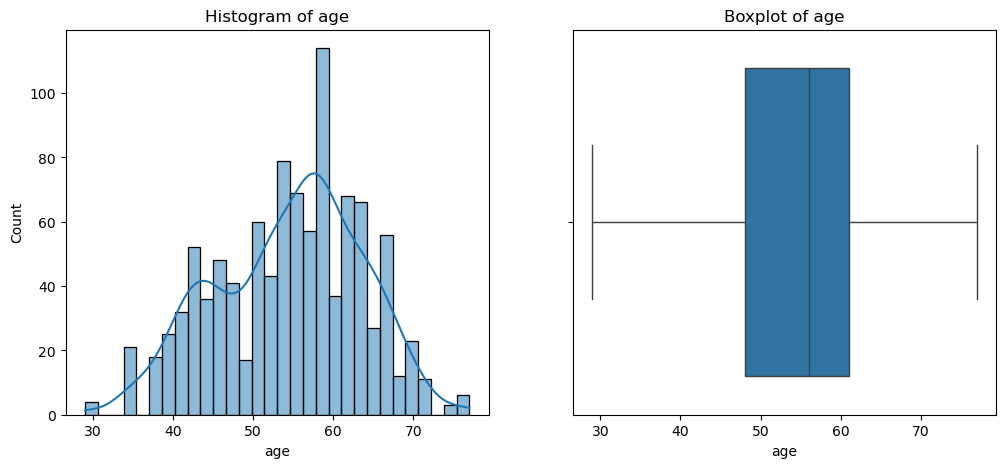

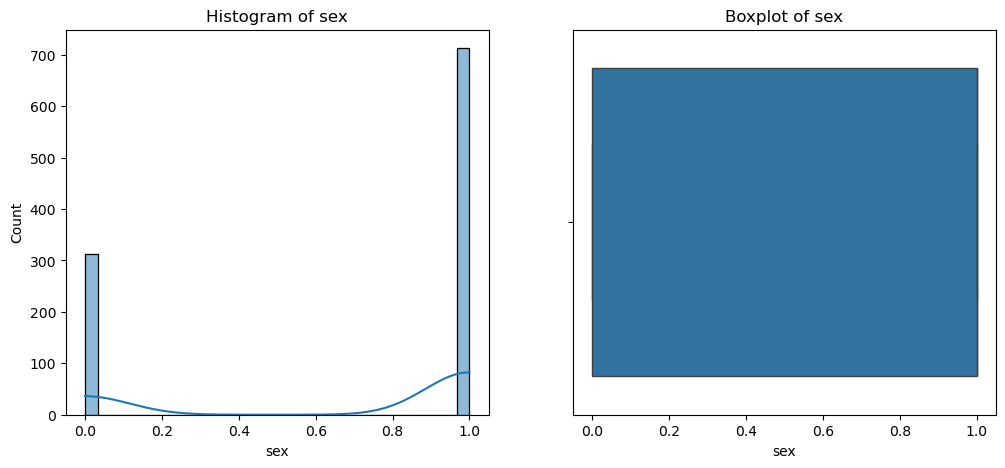

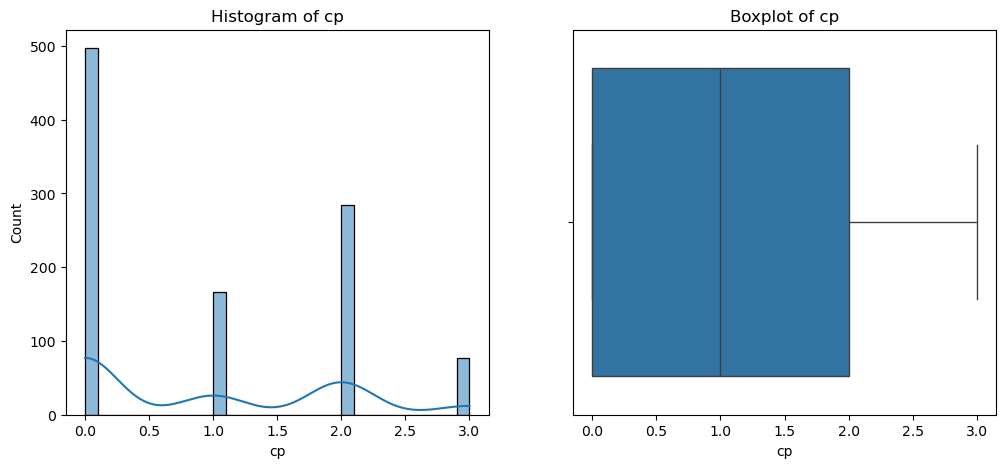

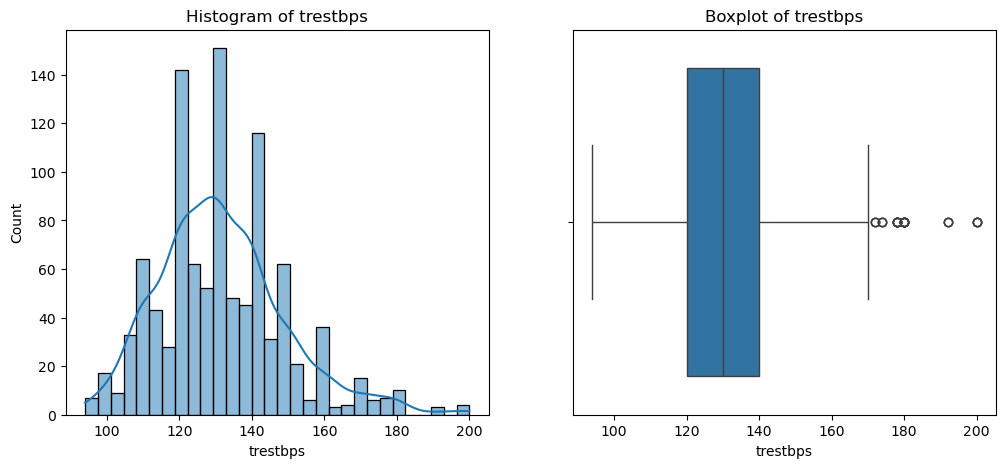

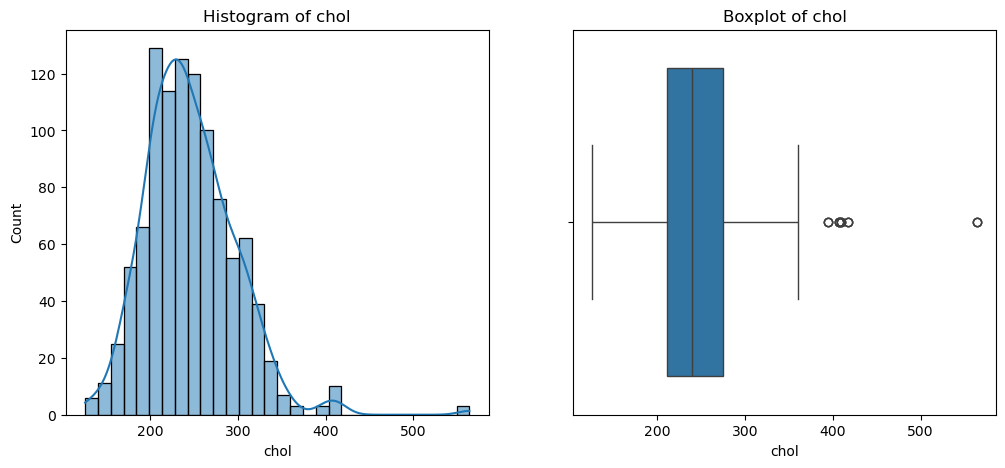

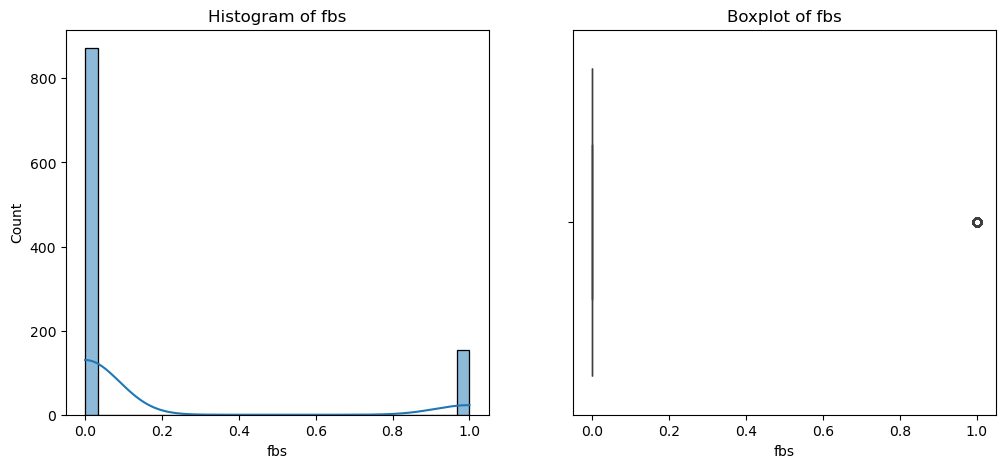

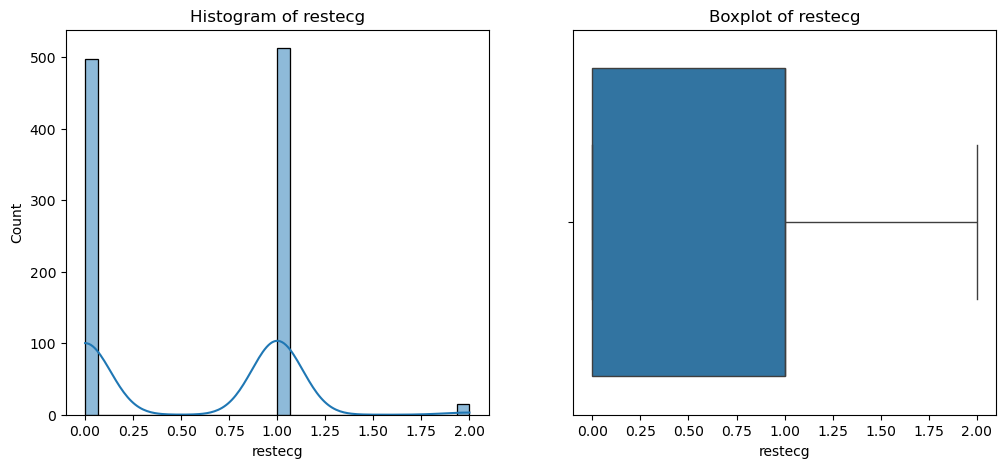

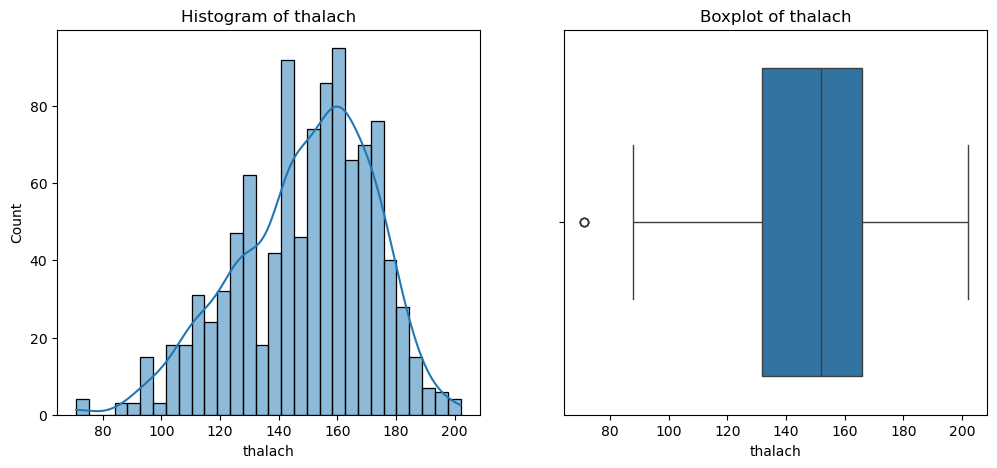

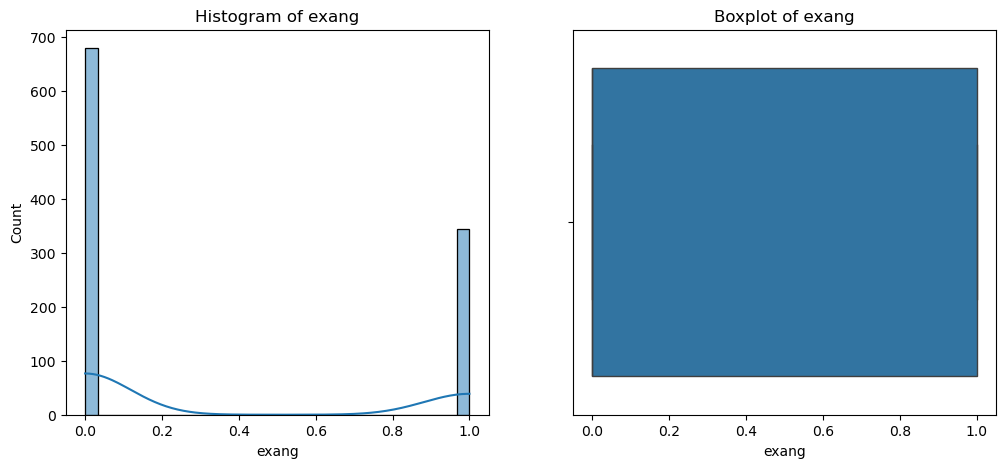

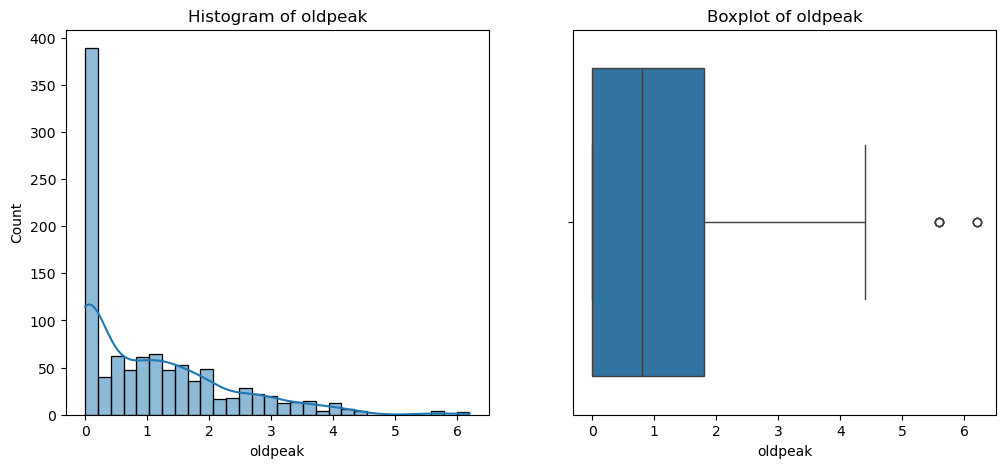

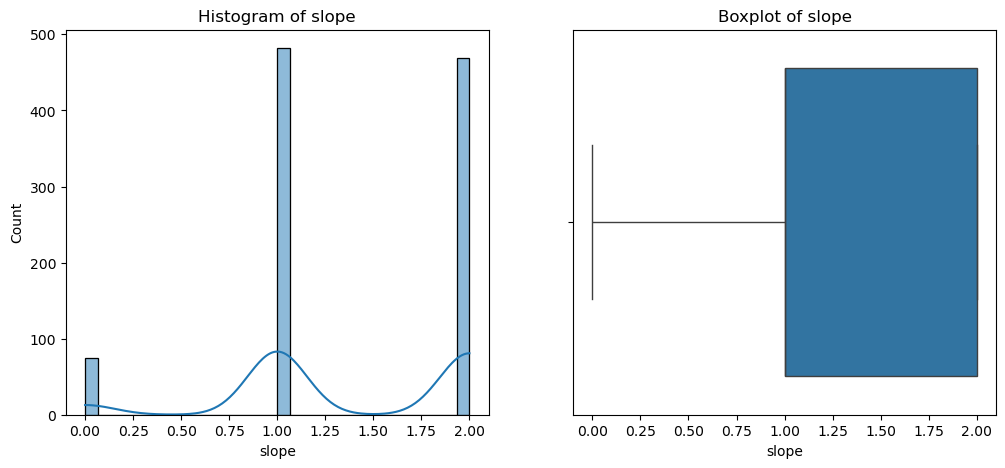

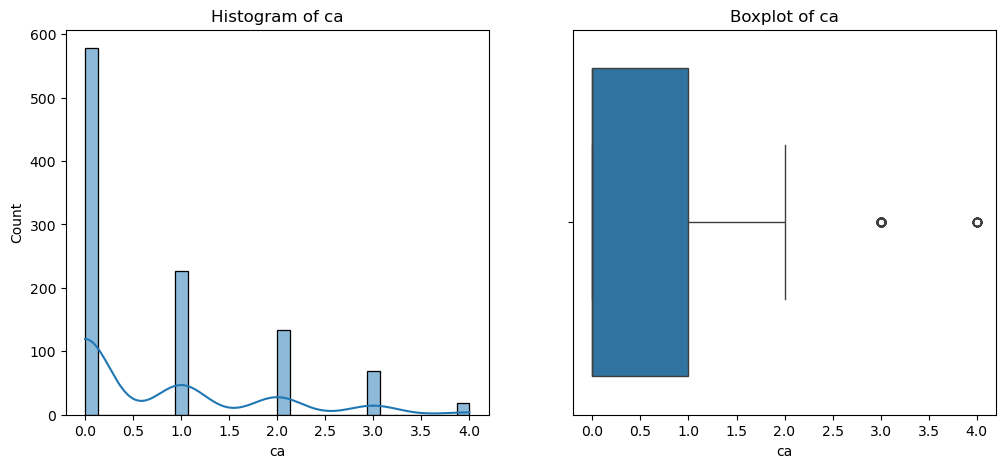

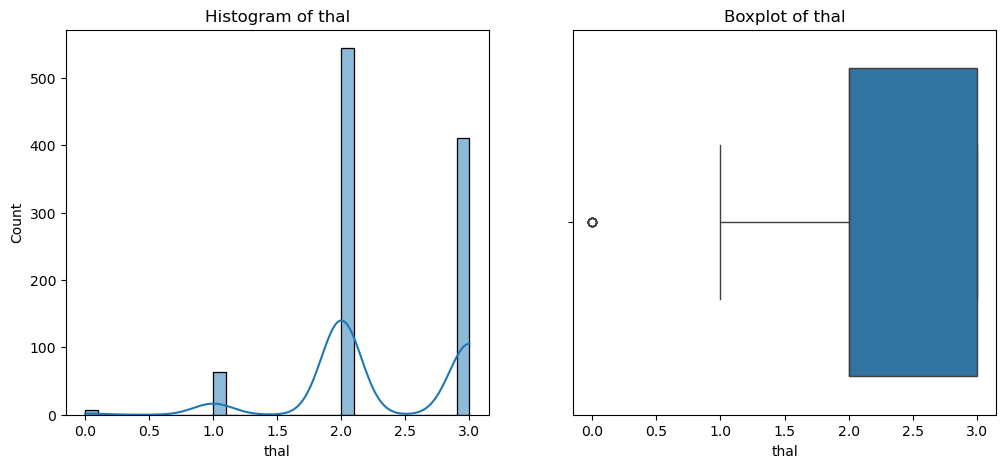

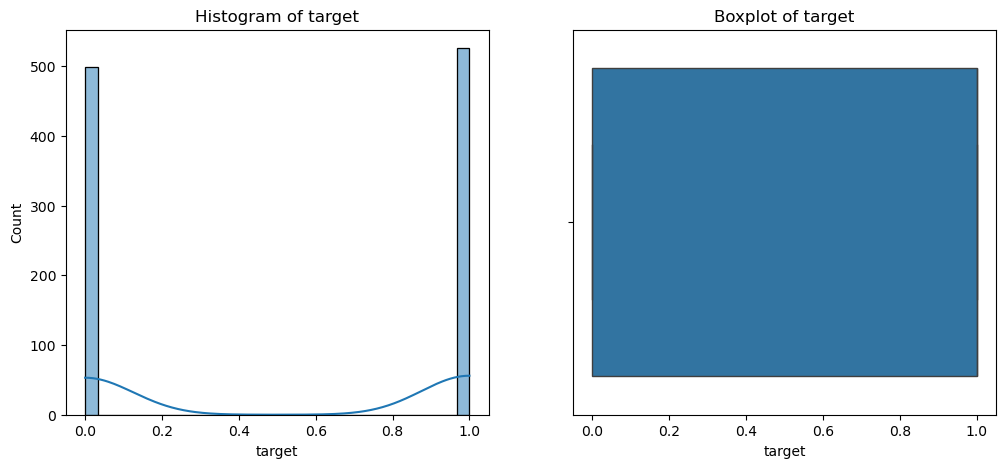


 🔎 Categorical Features Analysis...


In [41]:
class UnivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def analyze_numerical(self):
        """Plots histogram and boxplot for numerical features"""
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        for col in num_cols:
            plt.figure(figsize=(12,5))
            
            # Histogram
            plt.subplot(1,2,1)
            sns.histplot(self.df[col], kde=True, bins=30)
            plt.title(f"Histogram of {col}")
            
            # Boxplot
            plt.subplot(1,2,2)
            sns.boxplot(x=self.df[col])
            plt.title(f"Boxplot of {col}")
            
            plt.show()

    def analyze_categorical(self):
        """Plots countplot for categorical features"""
        cat_cols = self.df.select_dtypes(include=['object']).columns
        for col in cat_cols:
            plt.figure(figsize=(6,4))
            sns.countplot(x=self.df[col])
            plt.title(f"Countplot of {col}")
            plt.show()


if __name__ == "__main__":
    df = pd.read_csv("D:\\New folder (3)\\heart.csv")
    
    uni = UnivariateAnalysis(df)
    
    print("\n 🔎 Numerical Features Analysis...")
    uni.analyze_numerical()
    
    print("\n 🔎 Categorical Features Analysis...")
    uni.analyze_categorical()


# Bivariate Analysis 


 🔎 Numerical Features vs Target...


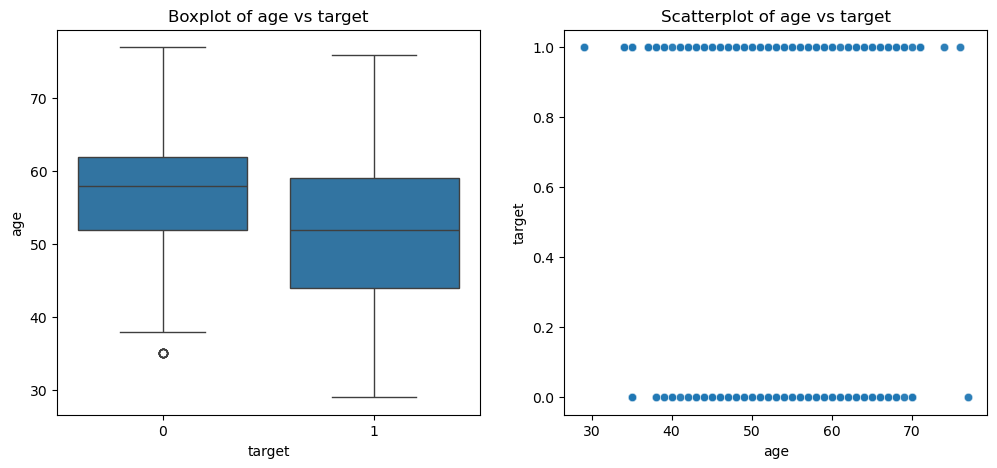

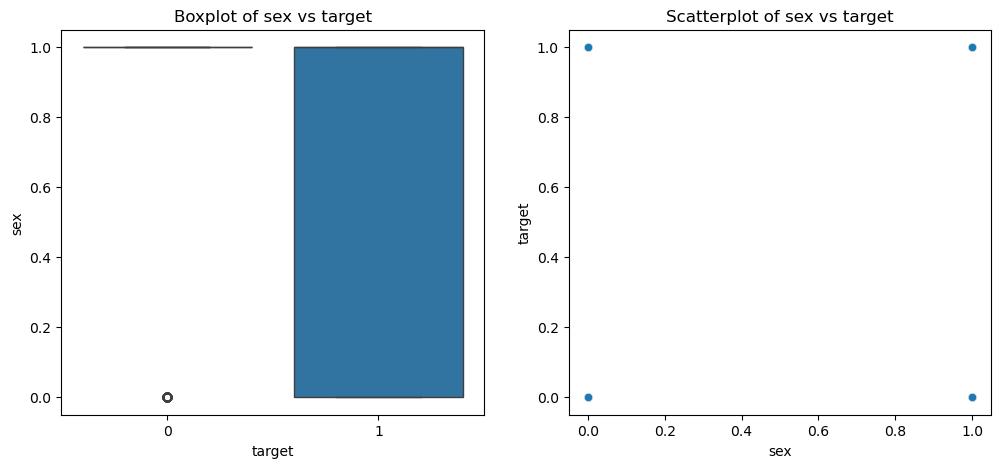

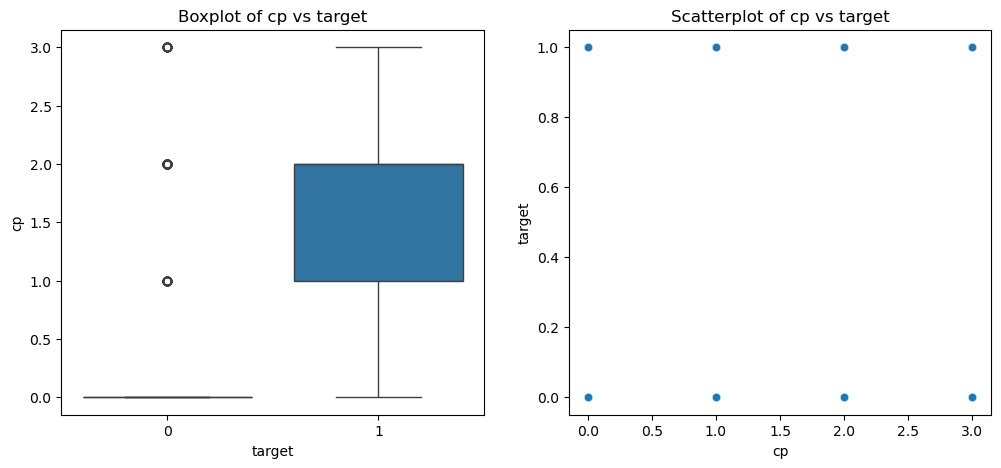

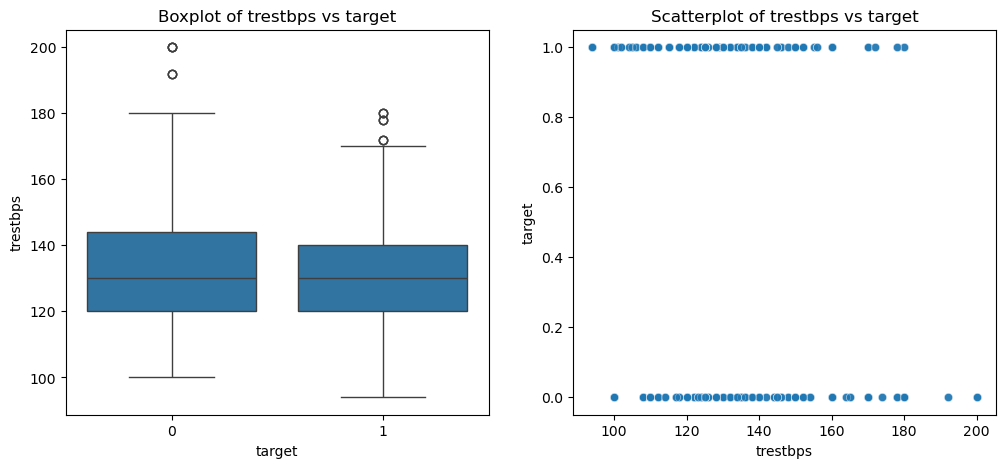

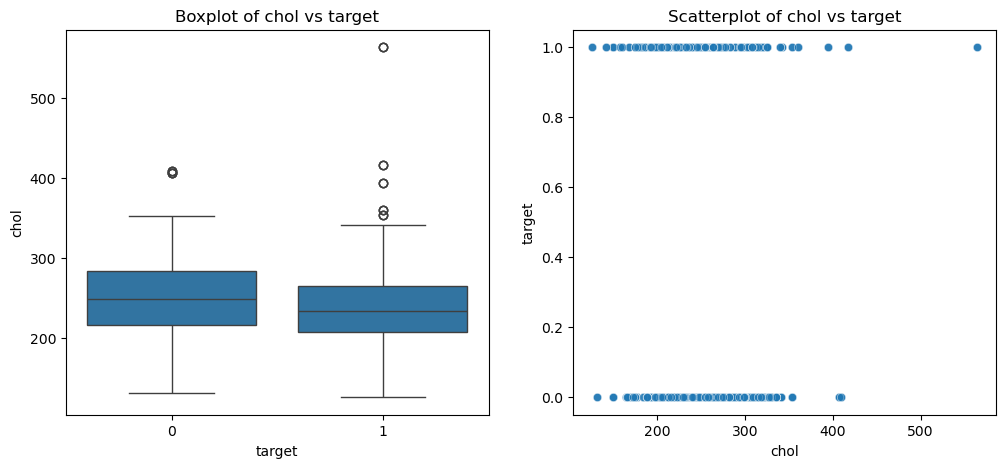

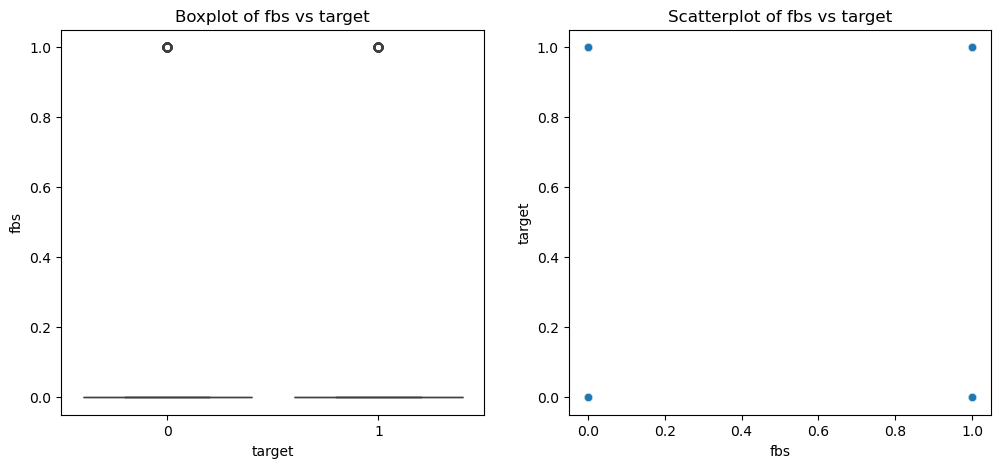

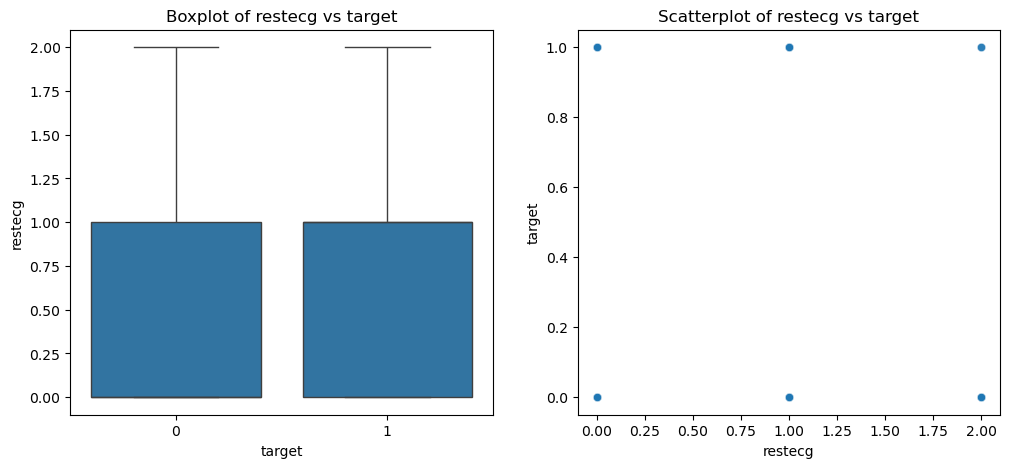

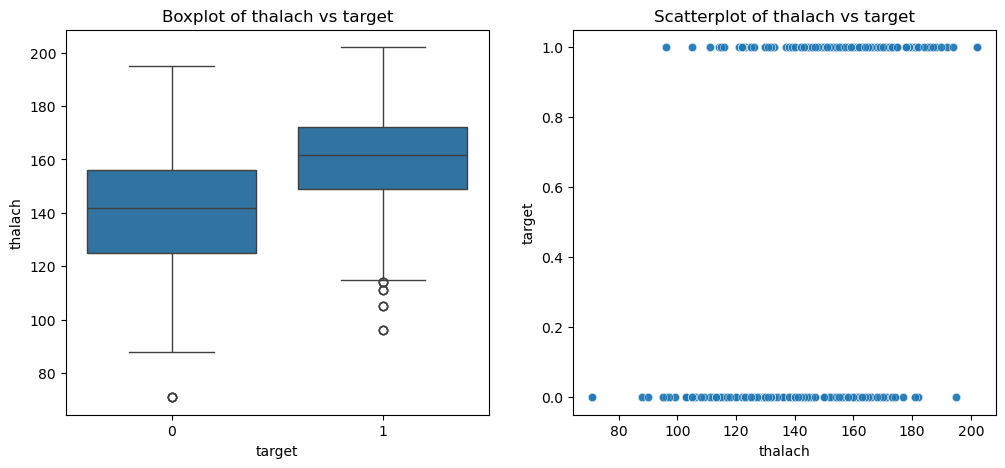

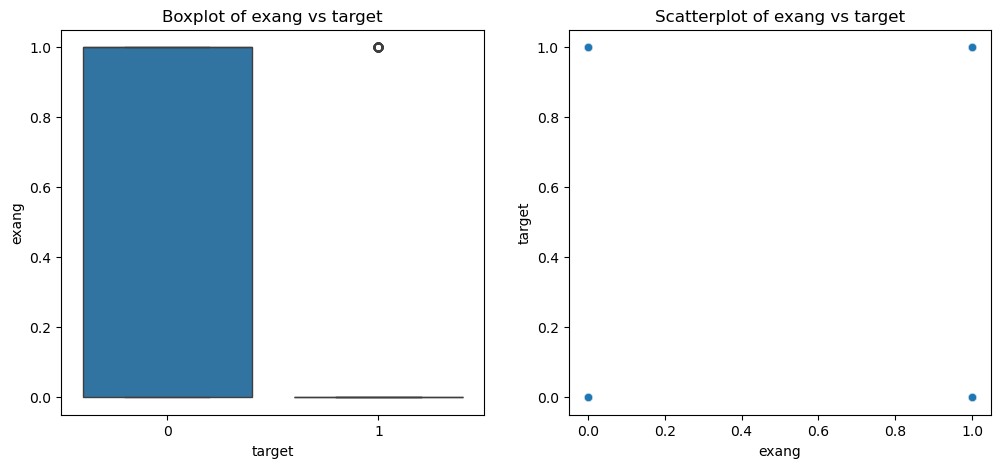

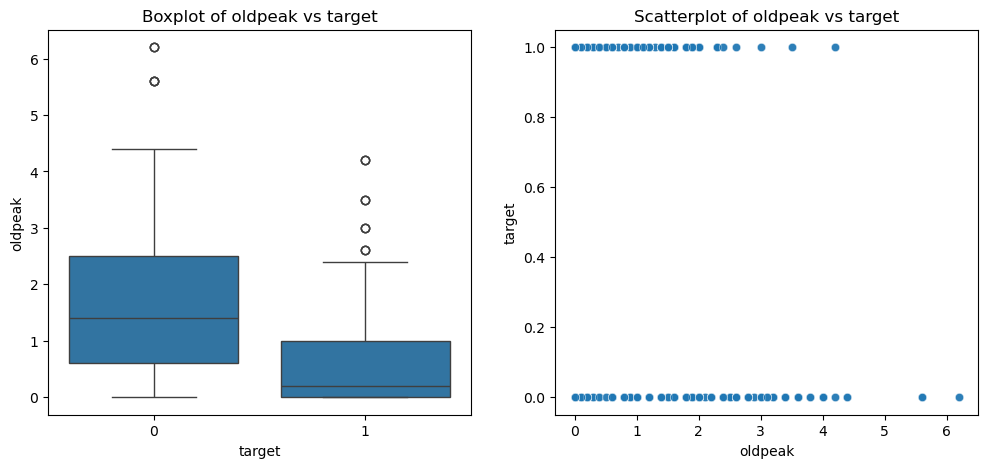

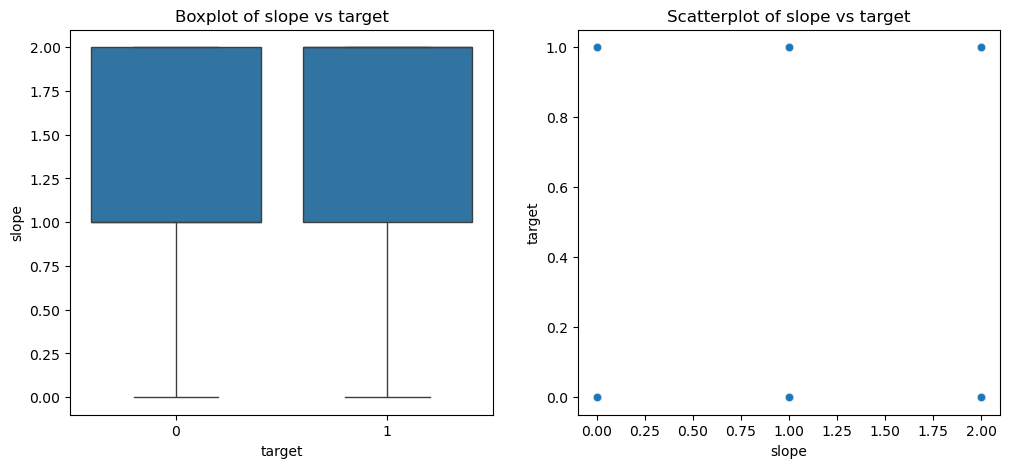

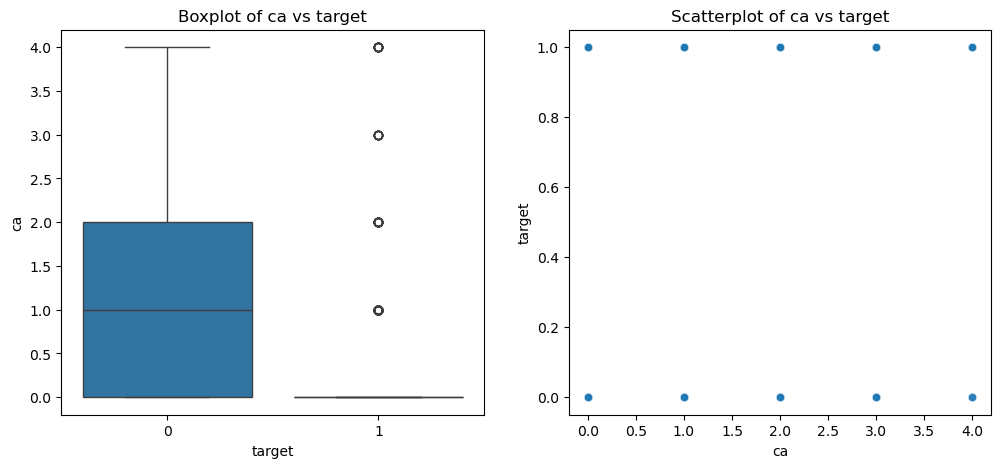

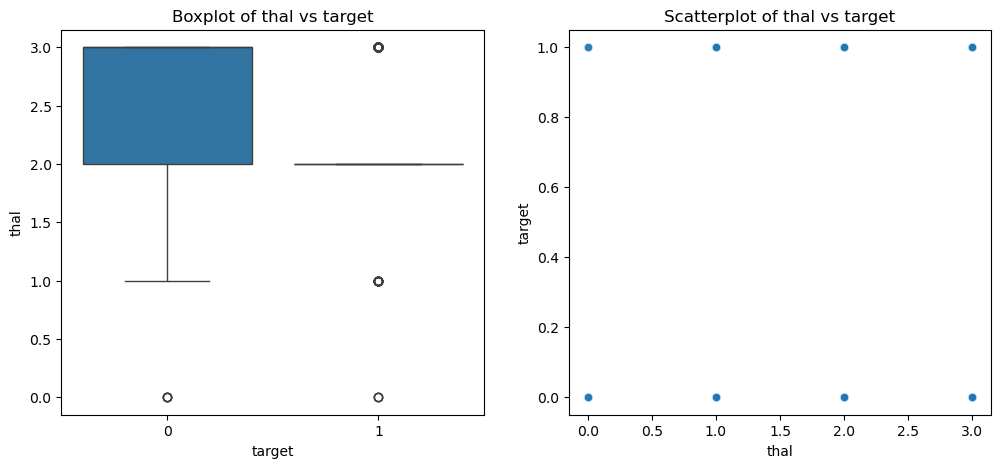


 🔎 Categorical Features vs Target...


In [42]:
class BivariateAnalysis:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def analyze_numerical(self):
        """Plots boxplot and scatterplot for numerical features vs target"""
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        num_cols = [col for col in num_cols if col != self.target]

        for col in num_cols:
            plt.figure(figsize=(12,5))
            
            # Boxplot
            plt.subplot(1,2,1)
            sns.boxplot(x=self.df[self.target], y=self.df[col])
            plt.title(f"Boxplot of {col} vs {self.target}")
            
            # Scatterplot
            plt.subplot(1,2,2)
            sns.scatterplot(x=self.df[col], y=self.df[self.target], alpha=0.6)
            plt.title(f"Scatterplot of {col} vs {self.target}")
            
            plt.show()

    def analyze_categorical(self):
        """Plots countplot for categorical features vs target"""
        cat_cols = self.df.select_dtypes(include=['object']).columns

        for col in cat_cols:
            plt.figure(figsize=(7,5))
            sns.countplot(x=self.df[col], hue=self.df[self.target])
            plt.title(f"Countplot of {col} vs {self.target}")
            plt.show()


if __name__ == "__main__":
    df = pd.read_csv("D:\\New folder (3)\\heart.csv")

   
    target_col = "target"  

    bi = BivariateAnalysis(df, target_col)

    print("\n 🔎 Numerical Features vs Target...")
    bi.analyze_numerical()

    print("\n 🔎 Categorical Features vs Target...")
    bi.analyze_categorical()


# Step 3: Data Splitting 


In [44]:
class DataSplit:
    def __init__(self, df, target):
        self.df = df
        self.target = target
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def split_features_target(self):
        """Separate features and target"""
        self.X = self.df.drop(columns=[self.target])
        self.y = self.df[self.target]
        print("\n Features and Target separated.")
        return self.X, self.y

    def train_test_split(self, test_size=0.2, random_state=42):
        """Split dataset into train and test sets"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )
        print(f"\n Data Split Done: Train = {self.X_train.shape[0]} rows, Test = {self.X_test.shape[0]} rows")
        return self.X_train, self.X_test, self.y_train, self.y_test



if __name__ == "__main__":
    df = pd.read_csv(r"D:\New folder (3)\heart.csv")

    target_col = "target" 

    splitter = DataSplit(df, target_col)

    X, y = splitter.split_features_target()
    X_train, X_test, y_train, y_test = splitter.train_test_split(test_size=0.2, random_state=42)

    print("\n First 5 rows of Training Features:")
    print(X_train.head())
    print("\n First 5 rows of Training Labels:")
    print(y_train.head())




 Features and Target separated.

 Data Split Done: Train = 820 rows, Test = 205 rows

 First 5 rows of Training Features:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
835   49    1   2       118   149    0        0      126      0      0.8   
137   64    0   0       180   325    0        1      154      1      0.0   
534   54    0   2       108   267    0        0      167      0      0.0   
495   59    1   0       135   234    0        1      161      0      0.5   
244   51    1   2       125   245    1        0      166      0      2.4   

     slope  ca  thal  
835      2   3     2  
137      2   0     2  
534      2   0     2  
495      1   0     3  
244      1   0     2  

 First 5 rows of Training Labels:
835    0
137    1
534    1
495    1
244    1
Name: target, dtype: int64


#  Step 4: Model Training (using SVM) 


In [47]:
class ModelTraining:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = None

    def train_model(self, kernel='linear'):
        """Train SVM model"""
        self.model = SVC(kernel=kernel, random_state=42)
        self.model.fit(self.X_train, self.y_train)
        print("\n Model training completed.")
        return self.model

    def evaluate_model(self):
        """Evaluate model on test set"""
        y_pred = self.model.predict(self.X_test)

        acc = accuracy_score(self.y_test, y_pred)
        report = classification_report(self.y_test, y_pred)
        cm = confusion_matrix(self.y_test, y_pred)

        print(f"\n Accuracy: {acc:.4f}")
        print("\n Classification Report:")
        print(report)
        print("\n Confusion Matrix:")
        print(cm)

        return acc, report, cm

if __name__ == "__main__":
    from sklearn.model_selection import train_test_split

    df = pd.read_csv(r"D:\New folder (3)\heart.csv")
    X = df.drop(columns=['target'])
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    trainer = ModelTraining(X_train, X_test, y_train, y_test)
    trainer.train_model(kernel='linear')   
    trainer.evaluate_model()



 Model training completed.

 Accuracy: 0.8049

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205


 Confusion Matrix:
[[72 30]
 [10 93]]


# Step 5: Model Saving using Pickle 


In [46]:
import pickle

class ModelPersistence:
    def __init__(self, model):
        self.model = model

    def save_model(self, filename="svm_model.pkl"):
        """Save trained model to a pickle file"""
        with open(filename, "wb") as file:
            pickle.dump(self.model, file)
        print(f"\n Model saved successfully as {filename}")

    @staticmethod
    def load_model(filename="svm_model.pkl"):
        """Load model from pickle file"""
        with open(filename, "rb") as file:
            model = pickle.load(file)
        print(f"\n Model loaded successfully from {filename}")
        return model


if __name__ == "__main__":
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC

    df = pd.read_csv(r"D:\New folder (3)\heart.csv")
    X = df.drop(columns=['target'])
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    saver = ModelPersistence(model)
    saver.save_model("heart_svm.pkl")

    loaded_model = ModelPersistence.load_model("heart_svm.pkl")

    sample_pred = loaded_model.predict(X_test[:5])
    print("\n Sample Predictions on first 5 rows of Test Set:")
    print(sample_pred)



 Model saved successfully as heart_svm.pkl

 Model loaded successfully from heart_svm.pkl

 Sample Predictions on first 5 rows of Test Set:
[1 1 0 1 0]
